<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Linear Support Vector Classification with Scale & Polynomial Features

This Code template is for the Classification task using a simple Linear Support Vector Classifier(LinearSVC) based on the Support Vector Machine algorithm with separate feature rescaling using Scale and pipelining PolynomialFeatures which is a feature transformation technique

### Required Packages

In [ ]:
!pip install imblearn

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, scale, PolynomialFeatures
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [33]:
#filepath
file_path= ''

List of features which are  required for model training .

In [34]:
#x_values
features=[]

Target feature for prediction.

In [35]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [36]:
df=pd.read_csv(file_path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [37]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [38]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.


In [39]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns

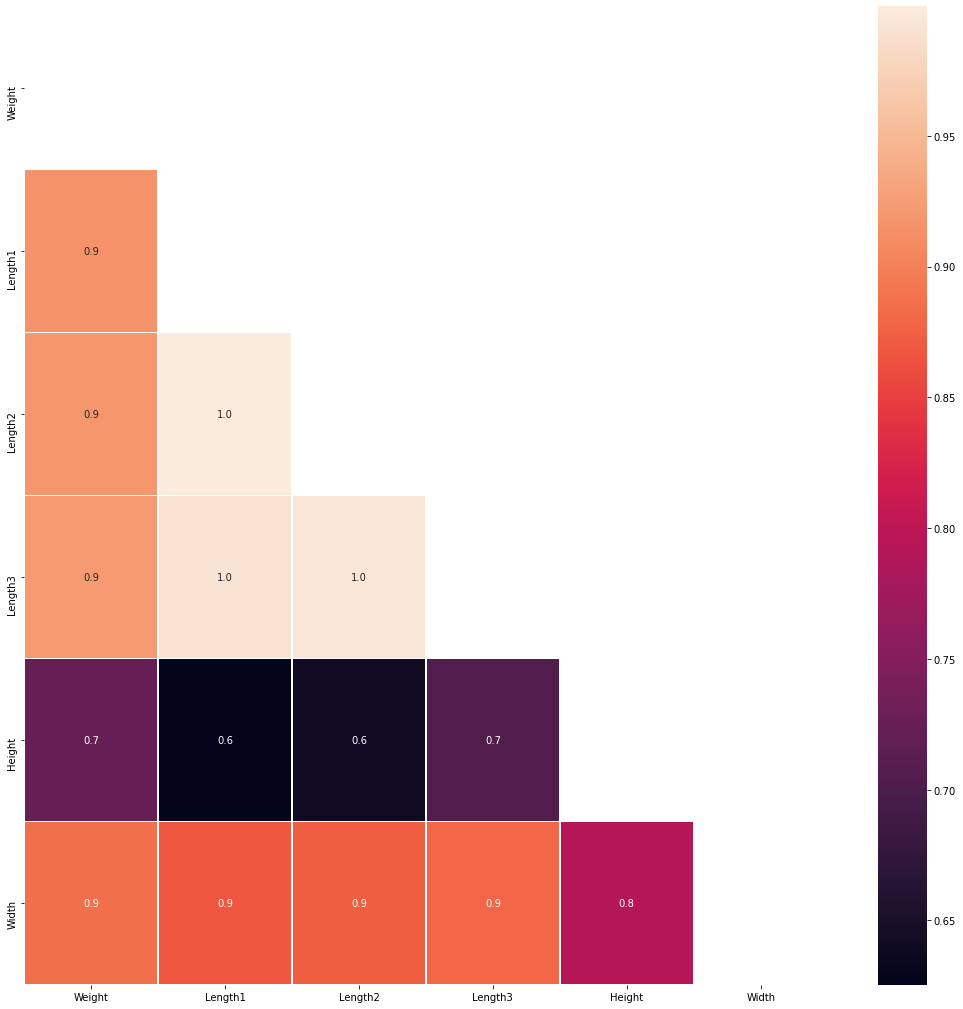

In [40]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Rescaling

Scale standardizes a dataset along any axis. It standardizes features by removing the mean and scaling to unit variance.

scale is similar to StandardScaler in terms of feature transformation, but unlike StandardScaler, it lacks Transformer API i.e., it does not have fit_transform, transform and other related methods.
Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

In [41]:
X_Scaled = scale(X)
X_Scaled=pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371



### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.


In [42]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.2,random_state=123)


### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.


In [43]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)


### Model

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

LinearSVC is similar to SVC with kernel=’linear’. It has more flexibility in the choice of tuning parameters and is suited for large samples.

Model Tuning Parameters:

- penalty  -> Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

- Loss  -> Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported.

- C ->  Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

- tolerance  -> Tolerance for stopping criteria.

### Feature Transformation

Polynomial Features is a technique to generate polynomial and interaction features.

Polynomial features are features created by raising existing features to an exponent. **PolynomialFeatures** function generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].


Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [44]:
model=make_pipeline(PolynomialFeatures(), LinearSVC(random_state=123))
model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearsvc', LinearSVC(random_state=123))])


### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.




In [45]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 96.88 %




### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.


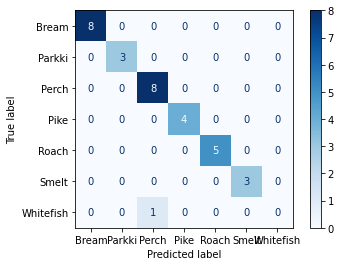

In [46]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

### Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.
where:
Precision:- Accuracy of positive predictions.
Recall:- Fraction of positives that were correctly identified.
f1-score:- percent of positive predictions were correct
support:- Support is the number of actual occurrences of the class in the specified dataset.

In [47]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         8
      Parkki       1.00      1.00      1.00         3
       Perch       0.89      1.00      0.94         8
        Pike       1.00      1.00      1.00         4
       Roach       1.00      1.00      1.00         5
       Smelt       1.00      1.00      1.00         3
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.84      0.86      0.85        32
weighted avg       0.94      0.97      0.95        32



 #### Creator: Aishwarya Guntoju, Github: [Profile](https://github.com/DSAishwaryaG)